# **Car plate number Recognition Model**

**1. Display the version information of the nvcc compiler.**

In [16]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


**2. Installing Python Packages.**

In [17]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless==4.1.2.30
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113


**3. Import necessary libraries/modules.**

In [18]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr



**4. Preprocessing**

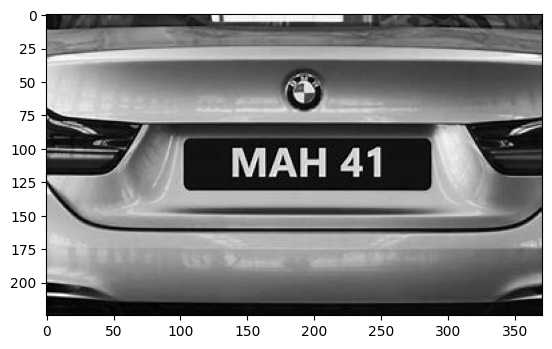

In [19]:
img=cv2.imread('/content/carplatenumber10.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)## due red green blue, pixel increase so that is why convert to gray
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))#savetime

**5. Apply Filters and edge detection**

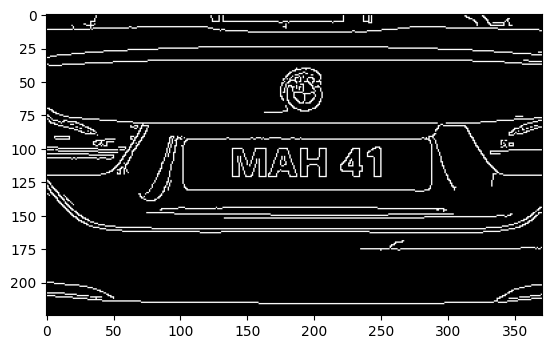

In [20]:
bfilter=cv2.bilateralFilter(gray,11,17,17)## noise reduced
edged=cv2.Canny(bfilter,30,200)## DETECT EDGE
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
### when we converted color->gray a lot of data/pixels got reduced due to which the analysis took less time
## now that we have used bfliter so that more time is reduced

**6. Find contours and apply mask**

In [21]:
## contours stroes polygons in a pic seperatly we can easily detect no. plate
keypoints=cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
## the sorting in descending order so that better shapes come first
## chain_approx line is used to simplofy the data ie if we dont use it then even pixels of line would get stored but we need proper polygons

In [22]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)### how many approx values if we increase value the result would be more rough accordingly
  if len(approx)==4:
    location=approx
    break

In [23]:
location

array([[[102,  98]],

       [[282,  92]],

       [[288, 127]],

       [[106, 131]]], dtype=int32)

In [24]:
## will finally mask
mask=np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

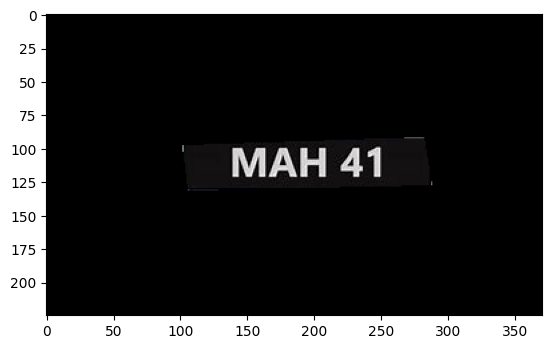

In [25]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [26]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

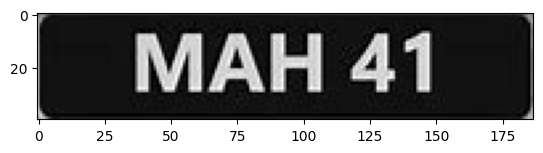

In [27]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

**7. Easy OCR use**

In [28]:
reader= easyocr.Reader(['en'])## english
result = reader.readtext(cropped_image)
result

[([[34, 4], [156, 4], [156, 36], [34, 36]], 'MAH 41', 0.9978071161570551)]

**8. Plot the Model**

In [29]:
if (len(result)==1):
  text = result[0][-2]
else:
  text = result[1][-2]
print(text)

MAH 41


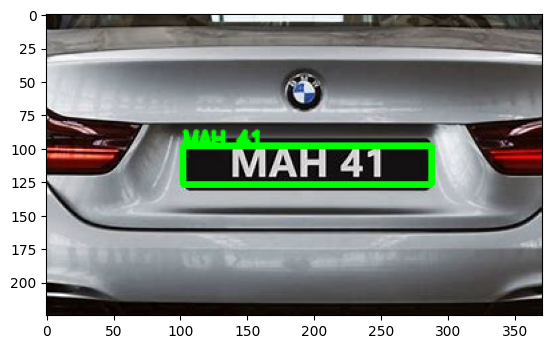

In [30]:
if (len(result)==1):
  text = result[0][-2]
else:
  text = result[1][-2]
#text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
#res=cv2.putText(img,text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=1)
res=cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
img = cv2.putText(img,text,tuple(approx[0][0]), font, 0.5,(0,255,0),2,cv2.LINE_AA)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))